## ODDEVEN

In [1]:
# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt install texlive-latex-extra
# ! sudo apt install dvipng
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns
import matplotlib
from math import sqrt

In [ ]:
OE = pd.read_csv('/content/drive/My Drive/CSCW_H1/results/big_data_OE_extra.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,11,12,13,16,18,25,27,28,29,33,34,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
for col in ['test_r_0','test_r_1','test_r_2','test_r_3','test_r_4']:
  print(col)
  OE[col+'proba'] = OE[col].apply(lambda x: list(map(float,x.strip('][').split(', '))))
  OE[col] = OE[col].apply(lambda x: np.argmax(list(map(float,x.strip('][').split(', ')))))

test_r_0
test_r_1
test_r_2
test_r_3
test_r_4


In [ ]:
OE['test_r'] = mode(OE[['test_r_0','test_r_1','test_r_2','test_r_3','test_r_4']].values, axis=1)[0]

In [ ]:
all(OE['test_r_0proba'] == OE['test_r_1proba']) == False

True

In [ ]:
OE[['test_r_0','test_r_1','test_r_2','test_r_3','test_r_4']].sample()

,test_r_0,test_r_1,test_r_2,test_r_3,test_r_4
365,1,1,1,1,1


In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
from IPython.display import clear_output
OE['test_proba_final'] = None
for index in OE.index:
  clear_output(wait=True)
  print(index)
  target = OE.loc[index, 'test_r']
  tmp = []
  for i in range(5):
    if OE.loc[index, 'test_r_'+str(i)]==target:
      tmp.append(softmax(OE.loc[index, 'test_r_'+str(i)+'proba']))
  # print(tmp)
  OE.at[index, 'test_proba_final'] = list(np.mean(tmp, axis=0))
OE.to_csv('/content/drive/My Drive/CSCW_H1/results/big_data_OE_extra_proba_added.csv', index=None)

80342


# Loading processed csv

In [ ]:
OE = pd.read_csv('/content/drive/My Drive/CSCW_H1/results/big_data_OE_extra_proba_added.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,11,12,13,16,18,25,27,28,29,33,34,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
OE['test_proba_final'] = OE['test_proba_final'].apply(lambda x: list(map(float,x.strip('][').split(', '))))
from sklearn.metrics import *
f1OE = []
thOE = []
supOE = []
for th_i in np.arange(0.6,0.61,0.05): # Threshold
   lsti = [i for i in range(len(OE)) if max(OE.loc[i, 'test_proba_final'])>=th_i]
   supOE.append(len(lsti))
   thOE.append(th_i)
   #f1OE.append(f1_score(np.array(test_y_allOE)[lsti], np.array(test_pred_y_allOE)[lsti], average='macro'))
th_i, len(lsti), len(OE)

(0.6, 78121, 80343)

In [ ]:
OE_reduced = OE.iloc[lsti]
print(len(OE_reduced))
OE_reduced['date'] = pd.to_datetime(OE_reduced['date'])
OE_new = OE_reduced.set_index('date', drop=False)
OE_new_dummy = pd.get_dummies(OE_new, columns=['test_r'], prefix='Classes')
OE_week = OE_new_dummy.sort_index().resample('W').sum().rolling(window="45D").mean()
OE_week['SUM'] = np.sum(OE_week[['Classes_0', 'Classes_1', 'Classes_2']], axis=1)
for col in ['Classes_0', 'Classes_1', 'Classes_2']:
  OE_week[col] = OE_week[col]/OE_week['SUM'] * 100

78121


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from IPython.display import clear_output
# 50-0 --- 37-0 -- 7-1 -- 6-2
# 50-1 --- 6-0 -- 40-1 -- 4-2
# 50-2 --- 6-0 -- 9-1 -- 35-2
pd.set_option('max_colwidth',2000)
print(OE_reduced[OE_reduced.test_r==2].sample(50, random_state=0)['tweet'])
# neg = []
# for ii, i in enumerate(OE_reduced[OE_reduced.test_r==2].sample(50, random_state=0)['tweet']):
#   clear_output(wait=True)
#   print(ii,'->>',i)
#   neg.append(input())
# pd.Series(neg).value_counts()
  

65257                                                                                                                                                                                           Air quality improves slightly on second day of #  odd-even http://tennews.in/air-quality-improves-slightly-second-day-odd-even/ …
44635                                                                                                                                                                               Pleased 2 find most even cars today.Lets make #  OddEven work. Quality & reliable public transport can make it a way of life @ carfreegurgaon
52111                                                                                                                                                                                @ HCL_Healthcare #  OddEven rule will obviously help us if it is implemented in an effective way, but not just in an experimentation method.
24844                             

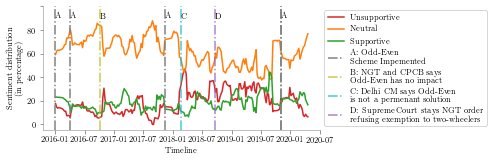

In [ ]:
import matplotlib.style as style
style.use('default')
latexify(columns = 2, fig_height = 2.3)
def hexify(r,g,b,a):
    return '#'+hex(r)[2:]+hex(g)[2:]+hex(b)[2:]+hex(a)[2:]
my_clr   = {'eq':hexify(224,224,224,255),
    'l_b':hexify(147,205,221,255),
    'l_r':hexify(248,177,99,255),
            'y':hexify(253,215,42,255),
            'b':hexify(81,151,213,255),
            }
my_clr   = {'eq':hexify(224,224,224,255),
    'l_b':hexify(147,205,221,255),
    'l_r':'tab:red',
            'y':'tab:orange',
            'b':'tab:green',
            }
clr_list = list(my_clr.values())
fig, ax = plt.subplots()
col_map = {'Classes_0':'Unsupportive', 'Classes_1':'Neutral', 'Classes_2':'Supportive'}
for c_i, col in enumerate(['Classes_0', 'Classes_1', 'Classes_2']):
  ax.plot(OE_week.index, OE_week[col], label=col_map[col], c=clr_list[c_i+2])

xcoords = ['2016-01-01 00:00:00','2016-04-02 00:00:00', '2017-11-11 00:00:00','2019-11-04 00:00:00',]
events = ['2016-10-06 04:50:00','2018-02-20 19:07:00', '2018-09-17 19:07:00']

for xc in xcoords:
    ax.axvline(x=pd.to_datetime(xc),color = 'grey', linewidth = 1.5, linestyle='dashdot')
    ax.text(pd.to_datetime(xc),90,'A')
ax.axvline(x=pd.to_datetime(xc),color = 'grey', linewidth = 1.5, linestyle='dashdot', label='A: Odd-Even \nScheme Impemented')

ax.axvline(x=pd.to_datetime(events[0]),color = 'tab:olive', 
           linewidth = 1.5, linestyle='dashdot',alpha=0.8, 
           label='B: NGT and CPCB says \nOdd-Even has no impact')
ax.text(pd.to_datetime(events[0]),90,'B')
ax.axvline(x=pd.to_datetime(events[1]),color = 'tab:cyan', 
           linewidth = 1.5, linestyle='dashdot',alpha=0.8, 
           label='C: Delhi CM says Odd-Even \nis not a permenant solution')
ax.text(pd.to_datetime(events[1]),90,'C')
ax.axvline(x=pd.to_datetime(events[2]),color = 'tab:purple', 
           linewidth = 1.5, linestyle='dashdot',alpha=0.8, 
           label='D: Supreme Court stays NGT order\nrefusing exemption to two-wheelers')
ax.text(pd.to_datetime(events[2]),90,'D')


ax.legend(bbox_to_anchor=(1,1));
plt.grid(False)
ax.set_xlabel('Timeline')
ax.set_yticks([0, 20, 40,60,80,100])
ax.set_yticklabels(['0%', '20%', '40%','60%','80%'])
ax.set_ylabel('Sentiment distribution\n(in percentage)')
format_axes(ax);
plt.tight_layout()
plt.savefig('OddEven-Updated.pdf')